In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


In [2]:
df_all = pd.read_csv('file2.csv')

In [3]:
df_all=df_all.drop(columns=['Unnamed: 0'])
df_all.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-06-24,caitlingeiger,camtronsummerswont know untilget new work sche...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
1,2009-06-15,mad_vtak,also togood friend congrats man engaged im hap...,"{'polarity': 0.8, 'subjectivity': 1.0, 'sentim...",0.800000,1.000000,Positive
2,2009-05-18,stupid_doll_,yaaaay finally,"{'polarity': 0.0, 'subjectivity': 1.0, 'sentim...",0.000000,1.000000,Neutral
3,2009-06-02,Geeklawyer,manxstef spoke canon take elstree ffs drive lo...,"{'polarity': -0.060714285714285714, 'subjectiv...",-0.060714,0.307143,Negative
4,2009-06-02,DrunkenNyt,simply orange thee best juice ever made,"{'polarity': 0.5, 'subjectivity': 0.3285714285...",0.500000,0.328571,Positive


In [4]:
df_all['date'] = pd.to_datetime(df_all['date'])
tweets_per_day = df_all.groupby(df_all['date'].dt.date)['text'].count()
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,4313
2009-04-07,22298
2009-04-17,3888
2009-04-18,27718
2009-04-19,34888


In [5]:

# Сортировка DataFrame по дате
df_sorted = tweets_per_day.sort_values(by='date')

# Получение первой строки (самой ранней даты)
first_row = df_sorted.iloc[0]

# Получение последней строки (самой поздней даты)
last_row = df_sorted.iloc[-1]

print("Первая строка (первая дата):\n", first_row)
print("\nПоследняя строка (последняя дата):\n", last_row)

Первая строка (первая дата):
 text    4313
Name: 2009-04-06, dtype: int64

Последняя строка (последняя дата):
 text    27634
Name: 2009-06-25, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm




/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: N

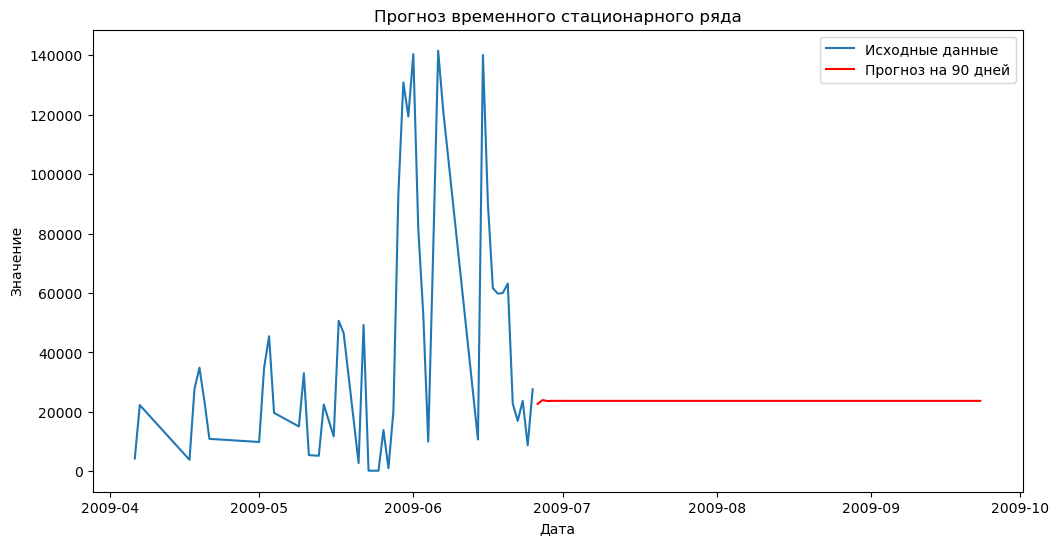

In [9]:
# Определение параметров ARIMA (p, d, q)
p, d, q = 1, 1, 0

# Создание модели ARIMA
model = sm.tsa.ARIMA(tweets_per_day, order=(p, d, q))
results = model.fit()

# Предсказание на будущий период (90 дней)
forecast_90_days = results.forecast(steps=90)

# Генерация дат для прогнозируемого периода
last_date = tweets_per_day.index[-1]
forecast_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

# Построение графика сравнения прогноза и реальных данных
plt.figure(figsize=(12, 6))
plt.plot(tweets_per_day.index, tweets_per_day, label='Исходные данные')
plt.plot(forecast_dates_90, forecast_90_days, label='Прогноз на 90 дней', color='red')
plt.legend()
plt.title('Прогноз временного стационарного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()


In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Предполагаем, что у вас уже есть стационарные данные временного ряда tweets_per_day
# (в случае, если данные не стационарны, выполните необходимые преобразования)

# Варианты параметров ARIMA для анализа
p_values = range(0, 3)  # Пример: значения от 0 до 2 (включительно) для p
d_values = range(0, 3)  # Пример: значения от 0 до 2 (включительно) для d
q_values = range(0, 3)  # Пример: значения от 0 до 2 (включительно) для q

# Анализ ACF и PACF для разных комбинаций параметров
for p in p_values:
    for d in d_values:
        for q in q_values:
            model = sm.tsa.ARIMA(tweets_per_day, order=(p, d, q))
            try:
                results = model.fit()
                print(f'ARIMA({p}, {d}, {q}) - AIC: {results.aic}')
            except:
                continue



/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A

ARIMA(0, 0, 0) - AIC: 1299.7898347127864
ARIMA(0, 0, 1) - AIC: 1149.2359045439807
ARIMA(0, 0, 2) - AIC: 1149.6578751968768
ARIMA(0, 1, 0) - AIC: 1128.3895757110154
ARIMA(0, 1, 1) - AIC: 1124.1108015276004
ARIMA(0, 1, 2) - AIC: 1123.9039017848368
ARIMA(0, 2, 0) - AIC: 1147.8365236330803
ARIMA(0, 2, 1) - AIC: 1112.1149892269582
ARIMA(0, 2, 2) - AIC: 1110.951836986203
ARIMA(1, 0, 0) - AIC: 1144.5818674741927
ARIMA(1, 0, 1) - AIC: 1146.3846851663502
ARIMA(1, 0, 2) - AIC: 1148.2234115311617
ARIMA(1, 1, 0) - AIC: 1127.0704050133968
ARIMA(1, 1, 1) - AIC: 1123.647634774065
ARIMA(1, 1, 2) - AIC: 1125.844471831181
ARIMA(1, 2, 0) - AIC: 1134.742572347136
ARIMA(1, 2, 1) - AIC: 1111.911497907902
ARIMA(1, 2, 2) - AIC: 1111.7503052474829
ARIMA(2, 0, 0) - AIC: 1146.4340734400014
ARIMA(2, 0, 1) - AIC: 1148.0408704070387
ARIMA(2, 0, 2) - AIC: 1150.1419840213423
ARIMA(2, 1, 0) - AIC: 1125.4456210535855
ARIMA(2, 1, 1) - AIC: 1125.4832220582664
ARIMA(2, 1, 2) - AIC: 1127.7273940414334
ARIMA(2, 2, 0) - AIC:

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A

В выводе, который вы предоставили, перечислены различные модели ARIMA с разными значениями параметров (p, d, q), а также значения критерия информационной сложности Акаике (AIC) для каждой модели.

AIC - это мера относительной качества модели. Он используется для сравнения различных моделей временных рядов и помогает определить, насколько хорошо модель описывает данные, при этом учитывая сложность модели. Чем меньше значение AIC, тем лучше модель.

В вашем выводе представлены различные модели ARIMA с различными значениями параметров p, d и q, и для каждой модели указано значение AIC. Например, модель ARIMA(0, 1, 1) имеет AIC равный 1124.11, что означает, что эта модель имеет относительно низкое значение AIC и может быть хорошим вариантом для прогнозирования данных.

При выборе оптимальной модели ARIMA, вы можете руководствоваться значением AIC. Но также учитывайте, что выбор модели может зависеть от других факторов, таких как интерпретируемость модели, ее способность обобщения на другие данные, итоговая точность прогнозов и др. Поэтому рекомендуется также проводить дополнительные тесты и сравнивать различные модели, чтобы выбрать наилучший вариант для вашего конкретного набора данных.

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


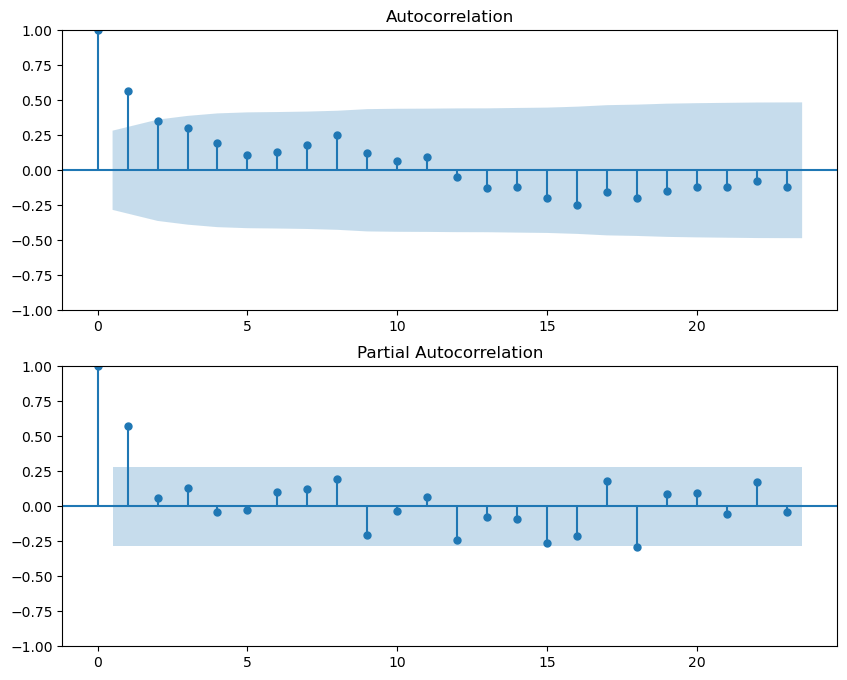

In [11]:
# Построение графиков ACF и PACF для оптимальных значений параметров (p, d, q)
optimal_p, optimal_d, optimal_q = 1, 1, 1  # Здесь используются значения из выбранной модели

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(tweets_per_day, lags=23, ax=axes[0])
plot_pacf(tweets_per_day, lags=23, ax=axes[1])

plt.show()

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: N

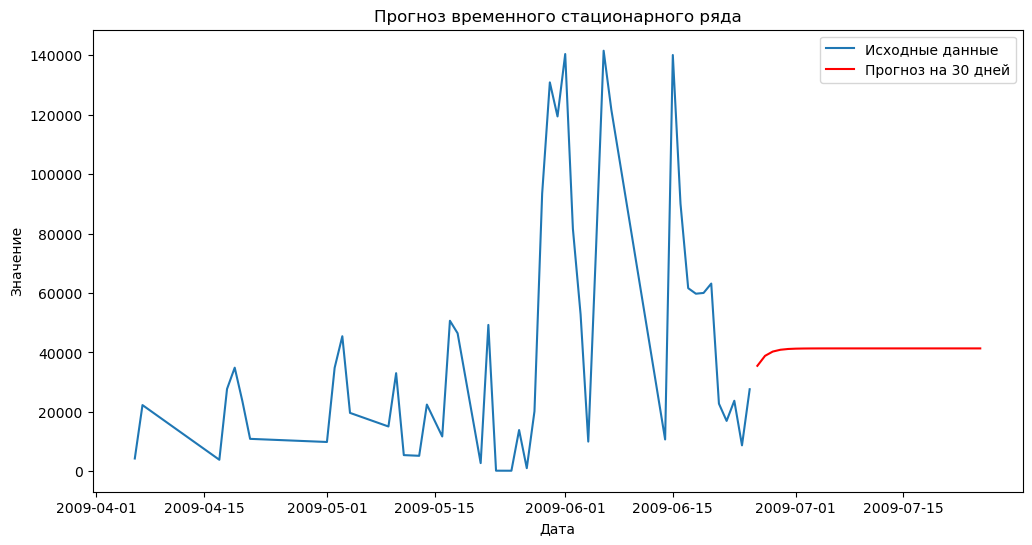

In [12]:
# Определение параметров ARIMA (p, d, q)
p, d, q = 1, 1, 1

# Создание модели ARIMA
model = sm.tsa.ARIMA(tweets_per_day, order=(p, d, q))
results = model.fit()

# Предсказание на будущий период (30 дней)
forecast_30_days = results.forecast(steps=30)

# Генерация дат для прогнозируемого периода
last_date = tweets_per_day.index[-1]
forecast_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Построение графика сравнения прогноза и реальных данных
plt.figure(figsize=(12, 6))
plt.plot(tweets_per_day.index, tweets_per_day, label='Исходные данные')
plt.plot(forecast_dates_30, forecast_30_days, label='Прогноз на 30 дней', color='red')
plt.legend()
plt.title('Прогноз временного стационарного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: N

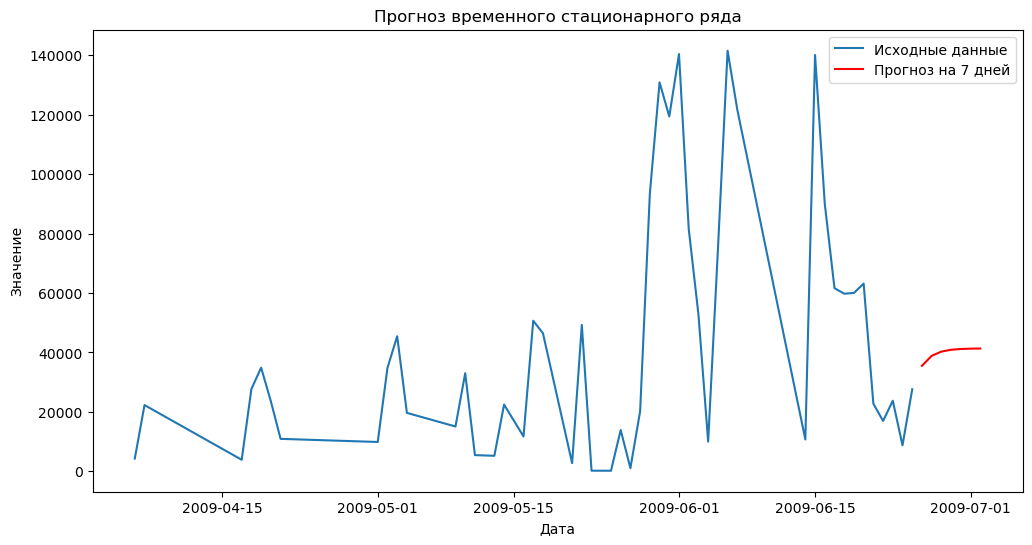

In [13]:
# Определение параметров ARIMA (p, d, q)
p, d, q = 1, 1, 1

# Создание модели ARIMA
model = sm.tsa.ARIMA(tweets_per_day, order=(p, d, q))
results = model.fit()

# Предсказание на будущий период (7 дней)
forecast_7_days = results.forecast(steps=7)

# Генерация дат для прогнозируемого периода
last_date = tweets_per_day.index[-1]
forecast_dates_7 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

# Построение графика сравнения прогноза и реальных данных
plt.figure(figsize=(12, 6))
plt.plot(tweets_per_day.index, tweets_per_day, label='Исходные данные')
plt.plot(forecast_dates_7, forecast_7_days, label='Прогноз на 7 дней', color='red')
plt.legend()
plt.title('Прогноз временного стационарного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

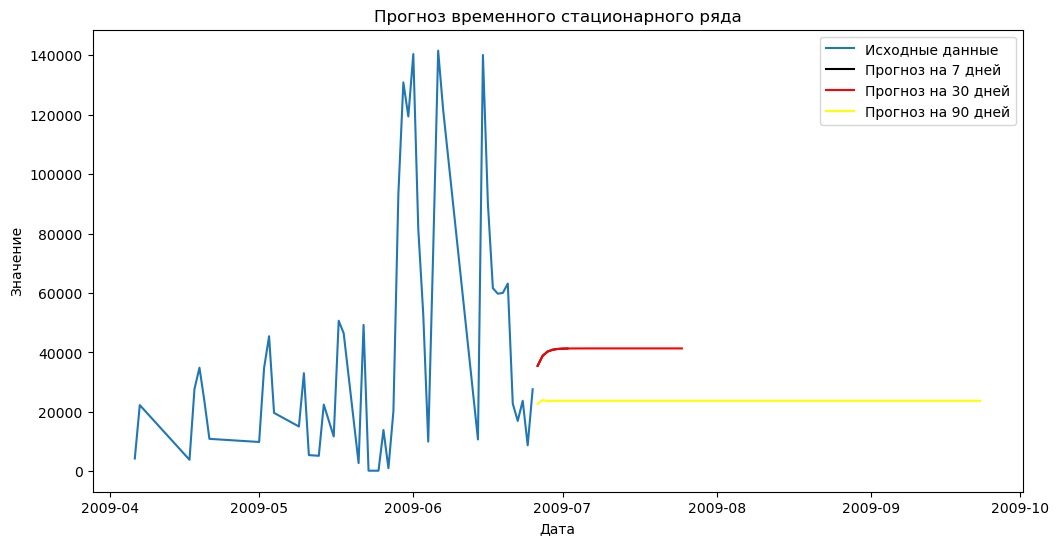

In [16]:
# Построение графика сравнения прогноза и реальных данных
plt.figure(figsize=(12, 6))
plt.plot(tweets_per_day.index, tweets_per_day, label='Исходные данные')
plt.plot(forecast_dates_7, forecast_7_days, label='Прогноз на 7 дней', color='black')
plt.plot(forecast_dates_30, forecast_30_days, label='Прогноз на 30 дней', color='red')
plt.plot(forecast_dates_90, forecast_90_days, label='Прогноз на 90 дней', color='yellow')
plt.legend()
plt.title('Прогноз временного стационарного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()